In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#For data visualization
import matplotlib.pyplot as plt
%matplotlib inline

## Loading of data and Overview of data

In [2]:
#Loading dataset
df = pd.read_csv(r'Project6500.csv', encoding='cp1252')
df['Date'] = pd.to_datetime(df['datetime']).dt.date
df['Time'] = pd.to_datetime(df['datetime']).dt.time

In [3]:
df.head(2)

,datetime,headline,ticker,sentiment,Date,Time
0,01/16/2020 05:25 AM,$MMM fell on hard times but could be set to re...,MMM,0,2020-01-16,05:25:00
1,01/11/2020 06:43,Wolfe Research Upgrades 3M $MMM to ¡§Peer Perf...,MMM,1,2020-01-11,06:43:00


In [4]:
df.shape

(9470, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9470 entries, 0 to 9469
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   9470 non-null   object
 1   headline   9470 non-null   object
 2   ticker     9470 non-null   object
 3   sentiment  9470 non-null   int64 
 4   Date       9470 non-null   object
 5   Time       9470 non-null   object
dtypes: int64(1), object(5)
memory usage: 444.0+ KB


In [6]:
df.isnull().sum()

datetime     0
headline     0
ticker       0
sentiment    0
Date         0
Time         0
dtype: int64

In [7]:
# percentage of positive tweets

print("Positive tweets percentage: {} %".format(100*len(df[df['sentiment']==1])/len(df['sentiment'])))

# percentage of negative tweets
print("negative tweets percentage: {} %".format(100*len(df[df['sentiment']==0])/len(df['sentiment'])))



Positive tweets percentage: 57.88806758183738 %
negative tweets percentage: 42.11193241816262 %


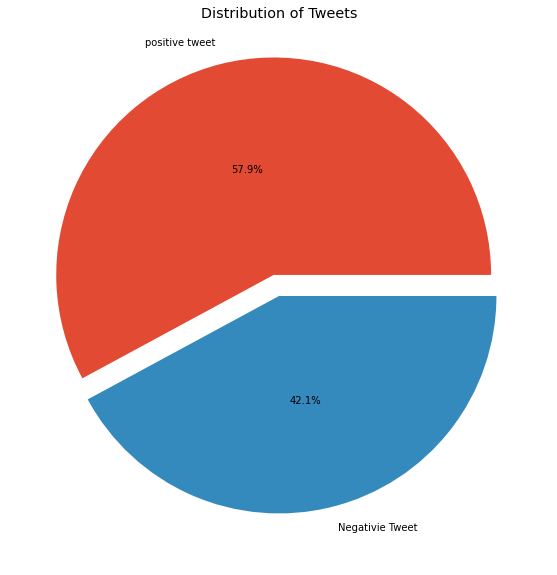

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(10,10))
plt.style.use("ggplot")
axs.pie(x=np.array([len(df[df['sentiment']==1]), len(df[df['sentiment']==0])]), autopct="%.1f%%", explode=[0.1,0], labels=["positive tweet", "Negativie Tweet"], pctdistance=0.5)
axs.title.set_text("Distribution of Tweets")

## Remove punctuations, special characters and stopwords from the text column. Convert the text to lower case

In [9]:
import re  
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
def News_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

#Applying only to first row

print("\nOriginal tweet ->", df['headline'][0])
print("\nProcessed tweet ->", News_to_words(df['headline'][0]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.

Original tweet -> $MMM fell on hard times but could be set to rebound soon.  

Processed tweet -> ['mmm', 'fell', 'hard', 'time', 'could', 'set', 'rebound', 'soon']


### Loading X and Y and Spliting of data

In [10]:
# Apply data processing to each tweet
X = list(map(News_to_words, df['headline']))

In [11]:
 Y = df.iloc[:, 3].values

In [36]:
Y.shape

(9470,)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
# Fit the training data
vocabulary_size = 3000
count_vector = CountVectorizer(max_features=vocabulary_size,
                            ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x)
X=count_vector.fit_transform(X).toarray()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [14]:
y_test.shape

(1894,)

## Model building using MultinomialNB

In [22]:
#Multinominal NB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
 
classifier = MultinomialNB();
classifier.fit(X_train, y_train)
 
# predicting test set results
y_pred = classifier.predict(X_test)
 
# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm


MultinomialNB Accuracy: 0.8901795142555439


array([[ 673,   94],
       [ 114, 1013]])

array([[ 673,   94],
       [ 114, 1013]])

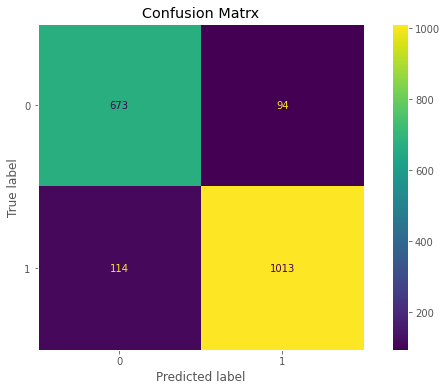

In [23]:
#Plotting Confusion matrix
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(False)
ax.set_title('Confusion Matrx')
disp =metrics.plot_confusion_matrix(classifier,X_test,y_test,ax=ax,values_format = 'd')
disp.confusion_matrix

In [24]:
#Check the accuracy of our MultinomialNB classifier
from sklearn import metrics
score = metrics.accuracy_score(y_test,y_pred,normalize=True)
print("accuracy: %0.3f" % score)
print(metrics.classification_report(y_test,y_pred,target_names=['label 0','label 1']))


accuracy: 0.890
              precision    recall  f1-score   support

     label 0       0.86      0.88      0.87       767
     label 1       0.92      0.90      0.91      1127

    accuracy                           0.89      1894
   macro avg       0.89      0.89      0.89      1894
weighted avg       0.89      0.89      0.89      1894



In [25]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

### Method 1 of POS: Applying directly on cleaned words without Stop words only which created for Model building

In [34]:
import nltk
def Pos_tagg_4_rows():
  for i in range(0,4):
    tag_i_row=nltk.pos_tag(News_to_words(df['headline'][i]))
    print(f"tag for row[{i}] is : {tag_i_row}")
Pos_tagg_4_rows()

tag for row[0] is : [('mmm', 'NN'), ('fell', 'VBD'), ('hard', 'JJ'), ('time', 'NN'), ('could', 'MD'), ('set', 'VB'), ('rebound', 'RP'), ('soon', 'RB')]
tag for row[1] is : [('wolf', 'NN'), ('research', 'NN'), ('upgrad', 'JJ'), ('3m', 'CD'), ('mmm', 'NNS'), ('peer', 'VBP'), ('perform', 'NN')]
tag for row[2] is : [('3m', 'CD'), ('mmm', 'JJ'), ('upgrad', 'JJ'), ('peer', 'NN'), ('perform', 'NN'), ('wolf', 'NN'), ('research', 'NN'), ('stock', 'NN')]
tag for row[3] is : [('mmm', 'NN'), ('insideday', 'NN'), ('follow', 'VB'), ('also', 'RB'), ('open', 'JJ'), ('nice', 'RB'), ('candl', 'VBP'), ('close', 'JJ'), ('prior', 'JJ'), ('day', 'NN'), ('high', 'JJ'), ('th', 'NN'), ('k', 'NN')]


In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##method 2 of POS: Tokenize only 4 rows from original data and apply POS on them, So With stop words


In [29]:
#Tokenize only first 4 rows of data 
First_4_rows=df.loc[:3, "headline"].apply(lambda x: nltk.word_tokenize(x))
print(First_4_rows)


0    [$, MMM, fell, on, hard, times, but, could, be...
1    [Wolfe, Research, Upgrades, 3M, $, MMM, to, ¡§...
2    [3M, $, MMM, Upgraded, to, ¡§Peer, Perform¡¨, ...
3    [$, MMM, #, insideday, follow, up, as, it, als...
Name: headline, dtype: object


In [35]:
# Applying POS on tokenised 4 rows only
def Pos_tagg_rows():
  for i in range(0,4):
    tag_i_row=nltk.pos_tag(First_4_rows[i])
    print(f"tag for row[{i}] is : {tag_i_row}")
Pos_tagg_rows()

tag for row[0] is : [('$', '$'), ('MMM', 'NNP'), ('fell', 'VBD'), ('on', 'IN'), ('hard', 'JJ'), ('times', 'NNS'), ('but', 'CC'), ('could', 'MD'), ('be', 'VB'), ('set', 'VBN'), ('to', 'TO'), ('rebound', 'VB'), ('soon', 'RB'), ('.', '.')]
tag for row[1] is : [('Wolfe', 'NNP'), ('Research', 'NNP'), ('Upgrades', 'NNP'), ('3M', 'CD'), ('$', '$'), ('MMM', 'NNP'), ('to', 'TO'), ('¡§Peer', 'VB'), ('Perform¡¨', 'NNP')]
tag for row[2] is : [('3M', 'CD'), ('$', '$'), ('MMM', 'NNP'), ('Upgraded', 'NNP'), ('to', 'TO'), ('¡§Peer', 'VB'), ('Perform¡¨', 'NNP'), ('by', 'IN'), ('Wolfe', 'NNP'), ('Research', 'NNP'), ('#', '#'), ('stocks', 'NNS')]
tag for row[3] is : [('$', '$'), ('MMM', 'NNP'), ('#', '#'), ('insideday', 'NN'), ('follow', 'VB'), ('up', 'RP'), ('as', 'IN'), ('it', 'PRP'), ('also', 'RB'), ('opened', 'VBD'), ('up', 'RP'), ('with', 'IN'), ('a', 'DT'), ('nice', 'JJ'), ('candle', 'NN'), ('that', 'WDT'), ('closed', 'VBD'), ('just', 'RB'), ('over', 'IN'), ('the', 'DT'), ('prior', 'JJ'), ('day', '

## Build and display a dependency parser tree for the sentence

In [31]:
from spacy import displacy
import spacy
nlp = spacy.load('en_core_web_sm')
about_interest_text = ("He appears to be the leading contender for being voted the new official Lord Commander of the Night's Watch")
displacy.render(nlp(about_interest_text),jupyter=True)